In [282]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random as rn

In [283]:
class Chebyshev:
    """
    Chebyshev(a, b, n, func)
    Given a function func, lower and upper limits of the interval [a,b],
    and maximum degree n, this class computes a Chebyshev approximation
    of the function.
    Method eval(x) yields the approximated function value.
    """
    def __init__(self, a, b, n, func):
        self.a = a
        self.b = b
        self.func = func

        bma = 0.5 * (b - a)
        bpa = 0.5 * (b + a)
        f = [func(math.cos(math.pi * (k + 0.5) / n) * bma + bpa) for k in range(n)]
        fac = 2.0 / n
        self.c = [fac * sum([f[k] * math.cos(math.pi * j * (k + 0.5) / n)
                  for k in range(n)]) for j in range(n)]

    def eval(self, x):
        a,b = self.a, self.b
        assert(a <= x <= b)
        y = (2.0 * x - a - b) * (1.0 / (b - a))
        y2 = 2.0 * y
        (d, dd) = (self.c[-1], 0)             # Special case first step for efficiency
        for cj in self.c[-2:0:-1]:            # Clenshaw's recurrence
            (d, dd) = (y2 * d - dd + cj, d)
        return y * d - dd + 0.5 * self.c[0]   # Last step is different

In [16]:
def ombar(xlist, n=2):
    y = []
    for x in xlist:
        yy = x
        for i in range(1,n+1):
            yy *= x-i
        y.append(yy)
    return y

In [15]:
def LegKernel(x,y,n):
    s = 0
    for k in range(0,n+1):
        f = np.polynomial.legendre.Legendre.basis(k)
        s += (k+.5)*f(x)*f(y)
    return s

In [19]:
def fa(x,a=1):
    return x**a if x>0 else 0

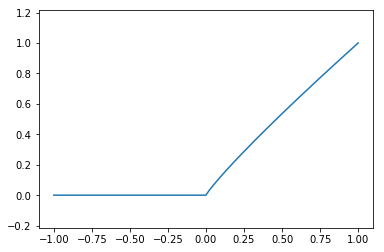

In [32]:
xres=np.linspace(-1,1,1000)
plt.plot(xres,[fa(x,.9) for x in xres])
plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [58]:
def constinterp(f,xn,xres):
#piecewise constant approximation
#assume xn[0]=xres[0], xn[last]=xres[last]
    node = 0
    val = f(.5*(xn[node]+xn[node+1]))
    y = []
    for x in xres:
        if x <= xn[node+1]:
          y.append(val)  
        else:
            node += 1
            val = f(.5*(xn[node]+xn[node+1]))
            y.append(val)
    return y

In [70]:
def lininterp(f,xn,xres):
#piecewise linear interpolation
#assume xn[0]=xres[0], xn[last]=xres[last]
    node = 0
    a = (f(xn[node+1])-f(xn[node]))/(xn[node+1]-xn[node])
    b = f(xn[node])-a*xn[node]
    y = []
    for x in xres:
        if x <= xn[node+1]:
          y.append(a*x+b)  
        else:
            node += 1
            a = (f(xn[node+1])-f(xn[node]))/(xn[node+1]-xn[node])
            b = f(xn[node])-a*xn[node]
            y.append(a*x+b)
    return y

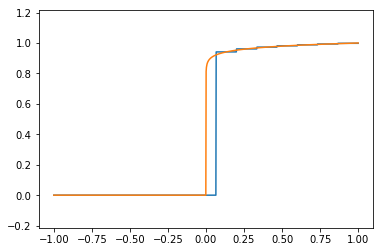

In [154]:
a=0.03
xn = np.linspace(-1,1,16)
fres=[fa(x,a) for x in xres]
plt.plot(xres,constinterp(lambda x:fa(x,a),xn,xres))
plt.plot(xres,fres)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

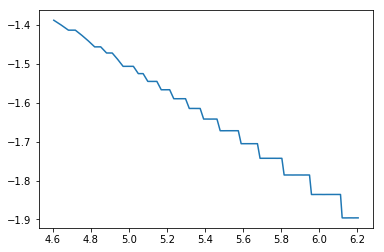

-0.32090886086873188

In [322]:
xres=np.linspace(-1,1,5000)
a=.3
fres=[fa(x,a) for x in xres]
nlist=range(100,500,4)
e=[]
elog=[]
for n in nlist:
    xn = np.linspace(-1,1,n)
    c=constinterp(lambda x:fa(x,a),xn,xres)
    dc=np.fabs(np.subtract(c,fres))
    ec=np.amax(dc)
    e.append(ec)
    elog.append(np.log(ec))
nlog=[np.log(n) for n in nlist]
plt.plot(nlog,elog)
m,_=np.polyfit(nlog,elog,1)
plt.show()
m

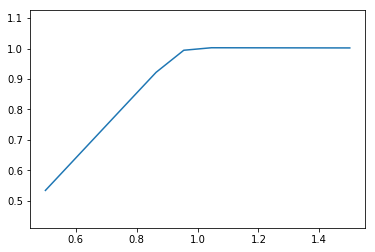

In [324]:
xres=np.linspace(-1,1,5000)
alist = np.linspace(.5,1.5,12)
nlist=range(210,700,10)
r=[]
for a in alist:
    fres=[fa(x,a) for x in xres]
    elog=[]
    for n in nlist:
        xn = np.linspace(-1,1,n)
        c=constinterp(lambda x:fa(x,a),xn,xres)
        elog.append(np.log(np.amax(np.fabs(np.subtract(c,fres)))))
    nlog=[np.log(n) for n in nlist]
    m,_=np.polyfit(nlog,elog,1)
    r.append(-m)
plt.plot(alist,r)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

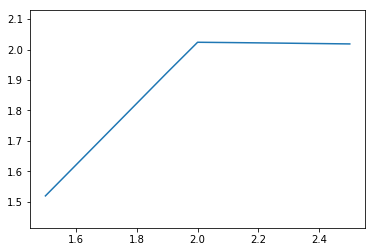

In [190]:
xres=np.linspace(-1,1,5000)
alist = np.linspace(1.5,2.5,11)
nlist=range(11,700,10)
r=[]
for a in alist:
    fres=[fa(x,a) for x in xres]
    elog=[]
    for n in nlist:
        xn = np.linspace(-1,1,n)
        c=lininterp(lambda x:fa(x,a),xn,xres)
        elog.append(np.log(np.amax(np.fabs(np.subtract(c,fres)))))
    nlog=[np.log(n) for n in nlist]
    m,_=np.polyfit(nlog,elog,1)
    r.append(-m)
plt.plot(alist,r)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [199]:
def decastel(t,xn):
#De Casteljau algorithm
    x = xn
    n = len(x)
    for k in range(n-1):
        for i in range(n-1-k):
            x[i] = (1-t)*x[i]+t*x[i+1]
    return x[0]

In [233]:
def bernstein(f,x,n,a=0,b=1):
    t = float(x-a)/(b-a)
    h = float(b-a)/n
    y = [f(a+i*h) for i in range(n+1)]
    return decastel(t,y)

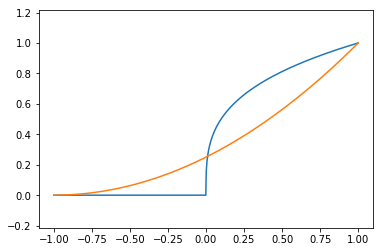

In [266]:
a = .3
n = 2
xres=np.linspace(-1,1,1000)
fres=[fa(x,a) for x in xres]
plt.plot(xres,fres)
plt.plot(xres,[bernstein(lambda x:fa(x,a),x,n,-1,1) for x in xres])
plt.axes().set_aspect('equal', 'datalim')
plt.show()

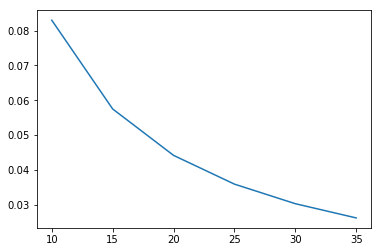

-0.92076568343638443

In [278]:
xres=np.linspace(-1,1,1000)
a=2
fres=[fa(x,a) for x in xres]
nlist=range(10,40,5)
e=[]
elog=[]
for n in nlist:
    c=[bernstein(lambda x:fa(x,a),x,n,-1,1) for x in xres]
    dc=np.fabs(np.subtract(c,fres))
    ec=np.amax(dc)
    e.append(ec)
    elog.append(np.log(ec))
nlog=[np.log(n) for n in nlist]
plt.plot(nlist,e)
m,_=np.polyfit(nlog,elog,1)
plt.show()
m

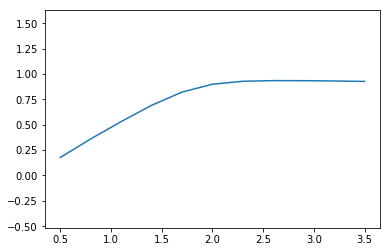

In [332]:
xres=np.linspace(-1,1,1000)
alist = np.linspace(.5,3.5,11)
nlist=range(4,40,10)
r=[]
for a in alist:
    fres=[fa(x,a) for x in xres]
    elog=[]
    for n in nlist:
        c=[bernstein(lambda x:fa(x,a),x,n,-1,1) for x in xres]
        elog.append(np.log(np.amax(np.fabs(np.subtract(c,fres)))))
    nlog=[np.log(n) for n in nlist]
    m,_=np.polyfit(nlog,elog,1)
    r.append(-m)
plt.plot(alist,r)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

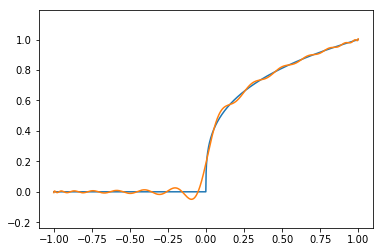

In [305]:
a = .3
n = 30
xres=np.linspace(-1,1,1000)
fres=[fa(x,a) for x in xres]
ch = Chebyshev(-1, 1, n, lambda x:fa(x,a))
plt.plot(xres,fres)
plt.plot(xres,[ch.eval(x) for x in xres])
plt.axes().set_aspect('equal', 'datalim')
plt.show()

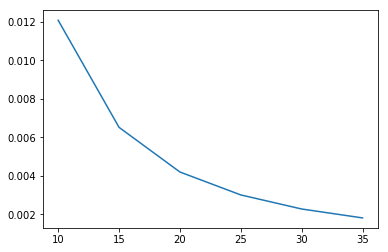

-1.5165656428372483

In [299]:
xres=np.linspace(-1,1,1000)
a=1.5
fres=[fa(x,a) for x in xres]
nlist=range(10,40,5)
e=[]
elog=[]
for n in nlist:
    ch = Chebyshev(-1, 1, n, lambda x:fa(x,a))
    c=[ch.eval(x) for x in xres]
    dc=np.fabs(np.subtract(c,fres))
    ec=np.amax(dc)
    e.append(ec)
    elog.append(np.log(ec))
nlog=[np.log(n) for n in nlist]
plt.plot(nlist,e)
m,_=np.polyfit(nlog,elog,1)
plt.show()
m

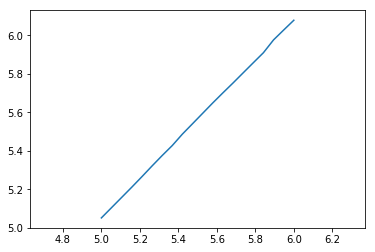

In [318]:
xres=np.linspace(-1,1,1000)
alist = np.linspace(5,6,20)
nlist=range(30,60,20)
r=[]
for a in alist:
    fres=[fa(x,a) for x in xres]
    elog=[]
    for n in nlist:
        ch = Chebyshev(-1, 1, n, lambda x:fa(x,a))
        c=[ch.eval(x) for x in xres]
        elog.append(np.log(np.amax(np.fabs(np.subtract(c,fres)))))
    nlog=[np.log(n) for n in nlist]
    m,_=np.polyfit(nlog,elog,1)
    r.append(-m)
plt.plot(alist,r)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [227]:
f = np.polynomial.legendre.Legendre.basis(8)
y = 0.5
n=20
xlist=np.linspace(0, 1, 1000)
plt.plot(xlist,[LegKernel(x,y,40) for x in xlist])
plt.show()

NameError: name 'LegKernel' is not defined

In [228]:
n=20
xlist=np.linspace(-.1, n+.1, 200)
plt.plot(xlist,ombar(xlist,n))
plt.show()

NameError: name 'ombar' is not defined